In [20]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video


a = 0.000001  # unit scale in meep
c = 299792458  # speed of light in a vacuum

def freq_to_mp(frequency_in_hz):
    meep_freq = (frequency_in_hz * a)/c
    return meep_freq

def meter_to_mp(length_in_meters):
    aa = 1                                   # aa = 1 micro meter
    meep_length = length_in_meters/aa
    return meep_length

def sec_to_mp(time_in_secs):
    meep_time = time_in_secs*c/a
    return meep_time

In [21]:
def func():
    resolution = 20
    cell_size = mp.Vector3(18, 14)
    pml_layers = [mp.PML(thickness=2)]

    rot_angle = np.radians(20)
    geometry = [
        mp.Block(
            center=mp.Vector3(),
            size=mp.Vector3(mp.inf, 1, mp.inf),
            e1=mp.Vector3(1, 0, 0),
            e2=mp.Vector3(0, 1, 0),
            material=mp.Medium(epsilon=12),
        )
    ]
    
    
    fsrc = freq_to_mp(45e12) # frequency of eigenmode or constant-amplitude source
    print("freq, ", fsrc)
    kx = 1  # initial wavevector guess in x direction of the eigenmode
    kpoint = mp.Vector3(x=kx)
    bnum = 1  # band number of the eigenmode

    
    ############source definition
    sources = [
        mp.EigenModeSource(
            #src=mp.ContinuousSource(fsrc, fwidth=0.5 * fsrc),
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(-7),
            size=mp.Vector3(y=4),
            direction=mp.NO_DIRECTION,
            eig_kpoint=kpoint,
            eig_band=bnum,
            eig_match_freq=True,
        )
    ]

    
    #simulation
    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        geometry=geometry,
    )


    animate = mp.Animate2D(sim, mp.Ez, normalize=True, realtime=True)
    sim.run(mp.at_every(1, animate), until=200)
    plt.show()
    plt.close()


    filename = "2d_straigth_eigcw_9jup.gif"
    animate.to_gif(10, filename)


freq,  0.15010384283916842
-----------
Initializing structure...
time for choose_chunkdivision = 0.00109506 s
Working in 2D dimensions.
Computational cell is 18 x 14 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.481743 s
-----------
MPB solved for frequency_1(1,0,0) = 0.309324 after 36 iters
MPB solved for frequency_1(0.428787,0,0) = 0.151088 after 9 iters
MPB solved for frequency_1(0.425244,0,0) = 0.150104 after 7 iters
MPB solved for frequency_1(0.425244,0,0) = 0.150104 after 2 iters


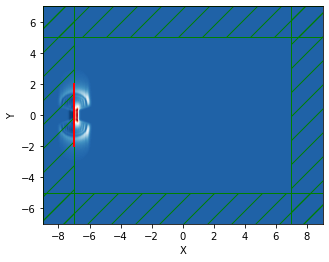

Meep progress: 1.0/200.0 = 0.5% done in 4.1s, 817.0s to go
on time step 40 (time=1), 0.102635 s/step
Meep progress: 8.25/200.0 = 4.1% done in 8.1s, 188.4s to go
on time step 330 (time=8.25), 0.0137967 s/step
Meep progress: 15.600000000000001/200.0 = 7.8% done in 12.1s, 143.1s to go
on time step 625 (time=15.625), 0.0135744 s/step
Meep progress: 22.425/200.0 = 11.2% done in 16.1s, 127.6s to go
on time step 897 (time=22.425), 0.0147143 s/step
Meep progress: 30.75/200.0 = 15.4% done in 20.1s, 110.8s to go
on time step 1231 (time=30.775), 0.0119995 s/step
Meep progress: 40.625/200.0 = 20.3% done in 24.1s, 94.7s to go
on time step 1627 (time=40.675), 0.0101183 s/step
Meep progress: 50.75/200.0 = 25.4% done in 28.1s, 82.8s to go
on time step 2031 (time=50.775), 0.00993266 s/step
Meep progress: 59.825/200.0 = 29.9% done in 32.1s, 75.3s to go
on time step 2394 (time=59.85), 0.0110262 s/step
Meep progress: 70.0/200.0 = 35.0% done in 36.2s, 67.2s to go
on time step 2800 (time=70), 0.00993713 s/s

In [22]:
if __name__ == '__main__':
    func()